# NFT 데이터 분석 

### 데이터 읽기

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

path = "./data/NFT_Sales.csv"
df = pd.read_csv(path, parse_dates=['Date']).set_index('Date')

*NFT 데이터*  
출처 : [NFT HistorySales](https://www.kaggle.com/mathurinache/nft-history-sales)  
데이터 범위 : 2017-06-22 ~ 2021-11-12  
*※Columns Explanation※*  
* * *
Sales_USD_cumsum :지금까지 누적 판매 달러  
Number_of_Sales_cumsum : 지금까지 누적 판매된 개수  
Active_Market_Wallets_cumsum :지금까지 거래가 이루어졌던 누적 마켓 지갑 수 (이용자 수라고 보면 됨)  
Primary_Sales_cumsum : 1차 시장 누적 판매 (1차 시장은 창작자와 수집가 사이의 거래)  
Secondary_Sales_cumsum : 2차 시장 누적 판매 (수집가가 다른 유저와 교환하는 거래 ex) opeanSea 거래)   

AverageUSD_cum	 평균 판매 달러  
Sales_USD 판매 가격  
Number_of_Sales 판매 개수  
Active_Market_Wallets	활성화된 마켓 지갑 수  
Primary_Sales : 1차 시장 누적 판매 (창작자와 수집가 사이의 거래)  
* * *

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1606 entries, 2017-06-22 to 2021-11-12
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sales_USD_cumsum              1606 non-null   float64
 1   Number_of_Sales_cumsum        1606 non-null   int64  
 2   Active_Market_Wallets_cumsum  1598 non-null   float64
 3   Primary_Sales_cumsum          1606 non-null   int64  
 4   Secondary_Sales_cumsum        1605 non-null   float64
 5   AverageUSD_cum                1605 non-null   float64
 6   Sales_USD                     1605 non-null   float64
 7   Number_of_Sales               1605 non-null   float64
 8   Active_Market_Wallets         1597 non-null   float64
 9   Primary_Sales                 1605 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 138.0 KB


In [127]:
df.tail()

,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
Date,,,,,,,,,,
2021-11-08,1.008803e+10,10913146,NaN,6541355,14829.0,924.39,7.706698e+07,59264.0,NaN,44435.0
2021-11-09,1.014001e+10,10964025,NaN,6573511,18723.0,924.84,5.197508e+07,50879.0,NaN,32156.0
2021-11-10,1.019902e+10,11008847,NaN,6601205,17128.0,926.44,5.901034e+07,44822.0,NaN,27694.0
2021-11-11,1.023456e+10,11022782,NaN,6609013,6127.0,928.49,3.554317e+07,13935.0,NaN,7808.0
2021-11-12,1.022836e+10,11020587,NaN,6607842,-1024.0,928.11,-6.196720e+06,-2195.0,NaN,-1171.0


### 데이터 NaN값 처리  
'Active_Market_Wallets_cumsum' 과 'Active_Market_Wallets'는 mean  
그 외에는 0으로 채움 별 이유는 없음   

In [128]:
df.isnull().sum()
df['Active_Market_Wallets_cumsum'] = df['Active_Market_Wallets_cumsum'].fillna(df['Active_Market_Wallets_cumsum'].mean())
df['Active_Market_Wallets'] = df['Active_Market_Wallets'].fillna(df['Active_Market_Wallets'].mean())
df = df.fillna(0)

### 데이터 추이 시각화 및 추이 분석  
\[1st plot\]NFT 판매량 : 2021년 7월쯤부터 NFT의 판매량이 많아졌다.  
\[2nd plot\]마켓 지갑 활성화 : 천천히 증가하다 마찬가지로 2021년 부터 NFT 시장에 들어오는 사람이 많아졌다.  
\[3rd plot\]판매 가격 : 한 단위당 100 milion USd이다. 한국돈 1200억원인데, 올해(2021년) 9월쯤에 하루 거래량이 4천억을 넘어선 일이 있었다.  
\[4th plot\]평균 판매 가격 : 극초반에 증가했다가 일정 판매가격을 유지하고, 최근들어 거품낀거마냥 폭등한걸 볼 수 있다. 

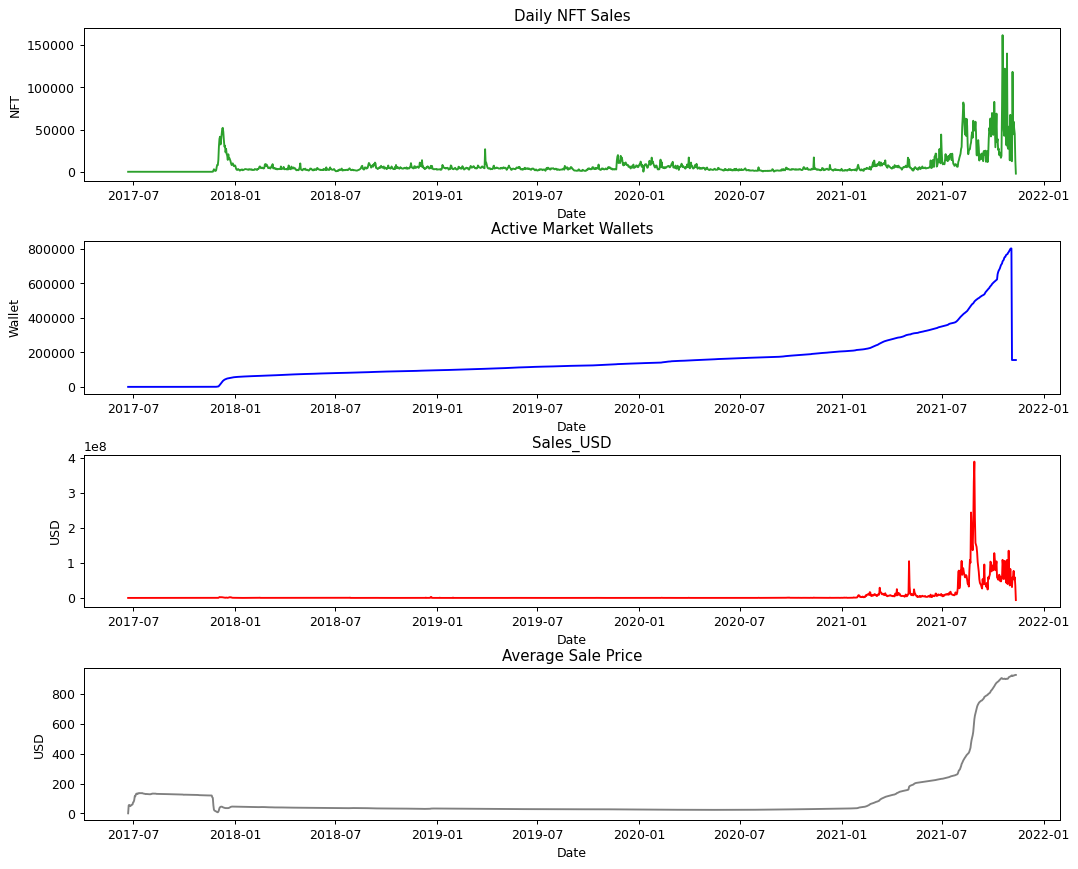

In [129]:
fig, axes = plt.subplots(4, 1, figsize=(14,11), dpi = 90)

plt.subplot(4, 1, 1)
plt.plot(df.index, df.Number_of_Sales, color='tab:green')
plt.gca().set(title='Daily NFT Sales', xlabel='Date', ylabel='NFT')

plt.subplot(4, 1, 2)
plt.plot(df.index, df.Active_Market_Wallets_cumsum, color='blue')
plt.gca().set(title='Active Market Wallets', xlabel='Date', ylabel='Wallet')

plt.subplot(4, 1, 3)
plt.plot(df.index, df.Sales_USD, color='red')
plt.gca().set(title='Sales_USD', xlabel='Date', ylabel='USD')

plt.subplot(4, 1, 4)
plt.plot(df.index, df.AverageUSD_cum, color='grey')
plt.gca().set(title='Average Sale Price', xlabel='Date', ylabel='USD')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)



*실제 거래되는 NFT 컬레션들에 대한 데이터를 분석하기 위해  
cryptoslam.io 사이트의 데이터를 수집한 파일을 이용했다.(11월 25일 기준)  
데이터 출처 : (https://www.kaggle.com/hemil26/nft-eda)  
  
Collections : NFT 컬렉션 이름  
Sales : 총 판매액  
Buyers : 구매자 수  
Txns :  트렌젝션된 횟수(교환 횟수)  
Owners :  컬렉션 소유자들 수  

In [133]:
path = "./data/nft_sales_cryptoslam.csv"
df = pd.read_csv(path)
df

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$3,328,148,500","1,079,811","9,755,511","2,656,431"
1,CryptoPunks,"$1,664,246,968","4,723","18,961","3,289"
2,Art Blocks,"$1,075,223,906","20,934","117,602","25,094"
3,Bored Ape Yacht Club,"$783,882,186","8,284","22,584","5,862"
4,NBA Top Shot,"$781,965,423","374,818","11,790,699","603,928"
...,...,...,...,...,...
245,Evolution,"$2,536,468",746,"4,961","2,061"
246,LegionPunks,"$2,535,490","1,702","3,794","2,410"
247,BabyApes,"$2,521,714","1,671","3,405","2,785"
248,Train of the Century,"$2,504,080","3,139","39,460","3,160"


데이터를 다루기 쉽게 변환

In [143]:
df.rename(columns = {'Sales':'Sales in USD','Txns':'Transactions'}, inplace = True)
df['Sales in USD'] = df['Sales in USD'].str.replace(',', '')
df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')
df['Buyers'] = df['Buyers'].str.replace(',','')
df['Transactions'] = df['Transactions'].str.replace(',','')
df['Owners'] = df['Owners'].str.replace(',','')
df=df.dropna() # 행이 다 채워지지 않은 object의 경우 없앴다.
df

,Collections,Sales in USD,Buyers,Transactions,Owners
0,Axie Infinity,3328148500,1079811,9755511,2656431
1,CryptoPunks,1664246968,4723,18961,3289
2,Art Blocks,1075223906,20934,117602,25094
3,Bored Ape Yacht Club,783882186,8284,22584,5862
4,NBA Top Shot,781965423,374818,11790699,603928
...,...,...,...,...,...
245,Evolution,2536468,746,4961,2061
246,LegionPunks,2535490,1702,3794,2410
247,BabyApes,2521714,1671,3405,2785
248,Train of the Century,2504080,3139,39460,3160


In [ ]:
#뭘 분석할 건지 추가하기~~










### 데이터 읽기 (NFT에 대한 트위터 반응 데이터)

*각 컬럼들에 의미를 확인해보자*  
user_name : 트위터 닉네임  
user_location : 유저 위치  
user_description : 유저 소개  
user_created :  회원가입 날짜  
user_followers : 팔로워 수, 해당 유저가 인플루언서인지 확인하는 중요한 컬럼    
user_friends : 해당 유저가 팔로우한 수  해당 유저가   
user_favourites : 해당 유저가 좋아요한 게시글 수(?)  
user_verified : 해당 유저가 인증된 사람인지 (False일 경우 익명성이 보장된다고 보면 된다.) 
date : 해당 tweet을 작성한 날짜  
text : 해당 tweet의 내용  
hashtgs : 해당 tweet에 사용된 해쉬태그  
source : 작성 방법 (앱을 이용했다던지.. 등)  
is_retweet : 글에 대한 대답인지(retweet인지)    

In [130]:
path = "./data/NFT_tweets.csv"
df_tweets = pd.read_csv(path)

df_tweets.info()
df_tweets.sample(n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12452 entries, 0 to 12451
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         12451 non-null  object
 1   user_location     6007 non-null   object
 2   user_description  10832 non-null  object
 3   user_created      12452 non-null  object
 4   user_followers    12452 non-null  int64 
 5   user_friends      12452 non-null  int64 
 6   user_favourites   12452 non-null  int64 
 7   user_verified     12452 non-null  bool  
 8   date              12452 non-null  object
 9   text              12452 non-null  object
 10  hashtags          7728 non-null   object
 11  source            12452 non-null  object
 12  is_retweet        12452 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 1.1+ MB


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
4839,☘️ ChefSerkozy ☘️,Ankara,$CAKE $GAL $CHZ $BNB $TWT #BSC,2009-10-18 13:31:56+00:00,141,960,3539,False,2021-11-14 14:37:15+00:00,Whitelist is open:\n🔗 https://t.co/toURf0y7vW ...,['NFT'],Twitter for iPhone,False
11925,Md Sabbir Hossain,NaN,Be happy and spreed happiness😊😊,2021-08-22 03:43:07+00:00,104,226,173,False,2021-11-14 12:42:50+00:00,$HEY up 200% in less than 2 hours?\nHow can yo...,NaN,Twitter for Android,False
5343,SpecialAnimK’,NaN,I am Sez iam owner of a new collection call a ...,2020-09-24 15:24:51+00:00,71,424,33,False,2021-11-14 14:28:09+00:00,"I've just minted ""Mira"" collectible! https://t...","['rarible', 'ethereum', 'flow', 'nonfungible',...",Twitter Web App,False
5080,Rizky,NaN,NaN,2021-06-17 09:47:14+00:00,25,457,469,False,2021-11-14 14:32:25+00:00,@doneswapp I am very happy if I become one of ...,NaN,Twitter for Android,False
2618,Emran Hosen,narail,Social Media Marketer,2020-10-04 19:21:55+00:00,22,95,677,False,2021-11-14 15:13:30+00:00,"@Elprofessor565 @babybadassNFT ""Awesome long t...","['partygrandpa', 'getretired', 'nft', 'nftart']",Twitter Web App,False


*인플루언서를 기반으로 트윗 데이터를 분석해보기 위해 follower가 300이하인 사람은 버리기?..
아니면 클러스터링 해도 되고, follower가 낮은 사람, 100단위로 하던지 등  

뭘 분석하고 싶은가..? 

근데 전부 카테고리칼 데이터라..ㅠㅠ


In [131]:
total = df_tweets.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
uniques = []
for col in df_tweets.columns:
    unique = df_tweets[col].nunique()
    uniques.append(unique)
tt['Uniques'] = uniques
np.transpose(tt)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,12451,6007,10832,12452,12452,12452,12452,12452,12452,12452,7728,12452,12452
Uniques,6530,1807,5450,6571,2099,2148,3150,2,7644,11768,2926,172,1
